# Simplest non-trivial case: 3 particles in $\mathbb{R}$. 

Each particle's position gets a coordinate, so the ambient space is $\mathbb{R}^3$. There's only one disallowed type of point: when all 3 coordinates coincide. That is, everything is allowed except those points on the line spanned by the vector $u$, below.

In [1]:
u = vector([1,1,1])

We can factor off an $\mathbb{R}$ off of the space $X=\mathbb{R}^3\setminus \langle u \rangle$ via the projection onto $u$. We can homotope the $\mathbb{R}$ factor away and see that $X$ is homotopy equivalent to the plane through the origin, perpendicular to $u$, minus the origin. That plane is spanned by some vectors, $v,w$, which we compute below.

In [2]:
v = vector([1,0,0])
w = vector([0,1,0])

v = v - (v*u)*u/u.norm()^2
w = w - (w*u)*u/u.norm()^2

w = w - (w*v)*v/v.norm()^2
w = w.simplify_full()

u = u/u.norm()
v = v/v.norm()
w = w/w.norm()

u = u.simplify_full()
v = v.simplify_full()
w = w.simplify_full()

pretty_print(v)
pretty_print(w)

(1/3*sqrt(3)*sqrt(2), -1/6*sqrt(3)*sqrt(2), -1/6*sqrt(3)*sqrt(2))

(0, 1/2*sqrt(2), -1/2*sqrt(2))

Let's draw $\langle u \rangle$ and the unit circle in $v,w$. The $v,w$ plane minus the origin is homotopy equivalent to the circle. (You can homotope the radial direction away.)

That circle is also the generator of $\pi_1$!

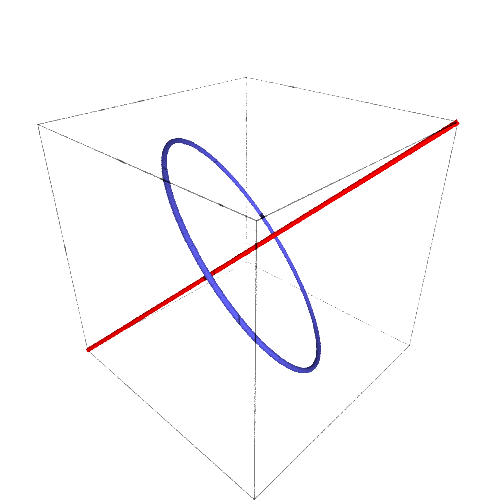

In [3]:
theta, rho = var('theta, rho')

P = parametric_plot3d(cos(theta)*v+sin(theta)*w,(theta,0,2*pi),thickness=4)

P += parametric_plot3d( theta*vector([1,1,1]),(theta,-1,1),thickness=4,color='red')

#P += parametric_plot3d( theta*vector([1,0,0])+rho*vector([0,1,0]),\
#                       (theta,-1,1),(rho,-1,1),thickness=4,color='green',alpha=0.5)
#P += parametric_plot3d( theta*vector([1,0,0])+rho*vector([0,0,1]),\
#                       (theta,-1,1),(rho,-1,1),thickness=4,color='green',alpha=0.5)
#P += parametric_plot3d( theta*vector([0,1,0])+rho*vector([0,0,1]),\
#                       (theta,-1,1),(rho,-1,1),thickness=4,color='green',alpha=0.5)

P.show(viewer='tachyon')
#P.show()

Now let's see what that generator looks like as a motion of particles. I've offset it a bit from the obvious $[0,2\pi]$ interval, so that the particles start distinct.

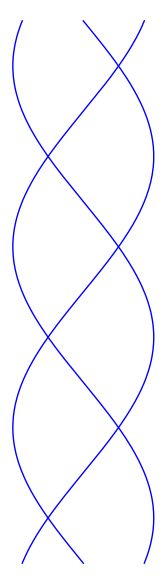

In [4]:
t = var('t')
p = cos(t)*v+sin(t)*w

a = p[0]
b = p[1]
c = p[2]

P  = parametric_plot((a,t),(t,pi/2,5/2*pi))
P += parametric_plot((b,t),(t,pi/2,5/2*pi))
P += parametric_plot((c,t),(t,pi/2,5/2*pi))

P.show(axes=False)

Note that this is the distinguishable points version. The indistinguishable points version should have more generators, corresponding to the elements of the symmetric group. One of them is special though (shown below), since three times it is the image of the one above.

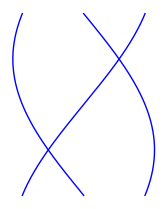

In [5]:
P  = parametric_plot((a,t),(t,pi/2,(2/3+1/2)*pi))
P += parametric_plot((b,t),(t,pi/2,(2/3+1/2)*pi))
P += parametric_plot((c,t),(t,pi/2,(2/3+1/2)*pi))

P.show(axes=False,figsize=3)

# More interesting case, 4 particles in $\mathbb{R}$

Now we have ${4 \choose 3} = 4$ disallowed configurations, each of which give a pair of equations which we'll encode as matrices $M_1, M_2, M_3, M_4$.

Again, though, there is an "all equal" vector $u$ which is parallel to all of the planes determined by the above equations. Let's set up some coordinates so that we can easily project the whole thing out.

In [6]:
u = vector([1,1,1,1])


v1 = vector([1,0,0,0])
v2 = vector([0,1,0,0])
v3 = vector([0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()

pretty_print(u)
pretty_print(v1)
pretty_print(v2)
pretty_print(v3)

(1/2, 1/2, 1/2, 1/2)

(1/2*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3))

(0, sqrt(2/3), -1/2*sqrt(2/3), -1/2*sqrt(2/3))

(0, 0, sqrt(1/2), -sqrt(1/2))

The four matrices, can then be rewritten in terms of the 3-space spanned by $v_1, v_2, v_3$.

In [7]:
M1 = matrix([[1,-1,0,0],[0,1,-1,0]])
M2 = matrix([[1,-1,0,0],[0,1,0,-1]])
M3 = matrix([[1,0,-1,0],[0,0,1,-1]])
M4 = matrix([[0,1,-1,0],[0,0,1,-1]])

pretty_print(M1,M2,M3,M4)

Pl = matrix([v1,v2,v3]).transpose()

pretty_print(Pl)

N1 = M1*Pl
N2 = M2*Pl
N3 = M3*Pl
N4 = M4*Pl

pretty_print(N1,N2,N3,N4)

[ 1 -1  0  0]
[ 0  1 -1  0] [ 1 -1  0  0]
[ 0  1  0 -1] [ 1  0 -1  0]
[ 0  0  1 -1] [ 0  1 -1  0]
[ 0  0  1 -1]

[   1/2*sqrt(3)              0              0]
[  -1/6*sqrt(3)      sqrt(2/3)              0]
[  -1/6*sqrt(3) -1/2*sqrt(2/3)      sqrt(1/2)]
[  -1/6*sqrt(3) -1/2*sqrt(2/3)     -sqrt(1/2)]

[  2/3*sqrt(3)    -sqrt(2/3)             0]
[            0 3/2*sqrt(2/3)    -sqrt(1/2)] [  2/3*sqrt(3)    -sqrt(2/3)             0]
[            0 3/2*sqrt(2/3)     sqrt(1/2)] [  2/3*sqrt(3) 1/2*sqrt(2/3)    -sqrt(1/2)]
[            0             0   2*sqrt(1/2)] [            0 3/2*sqrt(2/3)    -sqrt(1/2)]
[            0             0   2*sqrt(1/2)]

The kernels of the new matrices are 1-dimensional, so we find a basis for them.

In [8]:
w1 = N1.right_kernel().basis_matrix()[0]
w2 = N2.right_kernel().basis_matrix()[0]
w3 = N3.right_kernel().basis_matrix()[0]
w4 = N4.right_kernel().basis_matrix()[0]

w1 = (w1/w1.norm()).simplify_full()
w2 = (w2/w2.norm()).simplify_full()
w3 = (w3/w3.norm()).simplify_full()
w4 = (w4/w4.norm()).simplify_full()

pretty_print(w1)
pretty_print(w2)
pretty_print(w3)
pretty_print(w4)

(1/3, 1/3*sqrt(2), 1/3*sqrt(3)*sqrt(2))

(1/3, 1/3*sqrt(2), -1/3*sqrt(3)*sqrt(2))

(1/3, -2/3*sqrt(2), 0)

(1, 0, 0)

We know that when we remove these lines and quotient by the radial distance, we will get a 8 punctured sphere. Draw it for kicks.

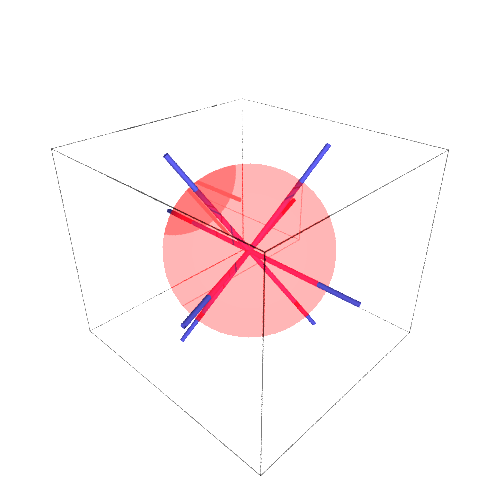

In [9]:
P  = parametric_plot3d( t*w1, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w2, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w3, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w4, (t,-1.5,1.5),thickness=4)

# just for visualization
x,y,z = var('x,y,z')
P += implicit_plot3d( x^2+y^2+z^2 ==1, (x,-1.1,1.1),(y,-1.1,1.1),(z,-1.1,1.1),color='red',opacity=0.4)

P.show(viewer='tachyon',aspect_ratio=1)
#P.show(viewer='threejs',aspect_ratio=1)
#P.show(aspect_ratio=1)

I'm having a difficult time seeing an obvious way to draw the 8 generating loops based at a common point. Maybe if I stereographically project?

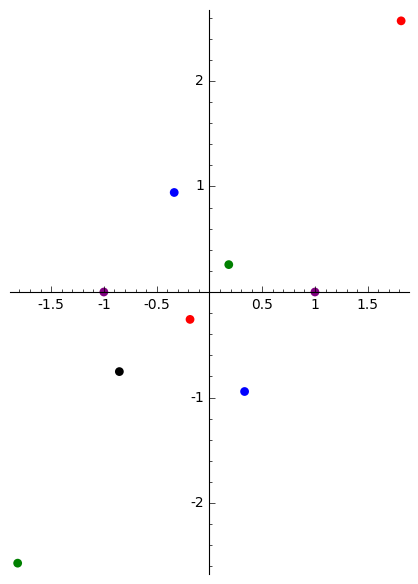

In [10]:
def stereographic_proj(v):
    return (v[0]/(1-v[2]),v[1]/(1-v[2]))

P  = point(stereographic_proj( w1), size=40, color='red')
P += point(stereographic_proj(-w1), size=40, color='red')

P += point(stereographic_proj( w2), size=40, color='green')
P += point(stereographic_proj(-w2), size=40, color='green')

P += point(stereographic_proj( w3), size=40, color='blue')
P += point(stereographic_proj(-w3), size=40, color='blue')

P += point(stereographic_proj( w4), size=40, color='purple')
P += point(stereographic_proj(-w4), size=40, color='purple')

# a nice generic point as a base point
pt = vector([-1,-1/2,1/2,1])
bp = vector(stereographic_proj(Pl.transpose()*pt))
P += point(bp, size=40, color='black')

P.show(aspect_ratio=1)

A set of loops going through the base point, representing generators.

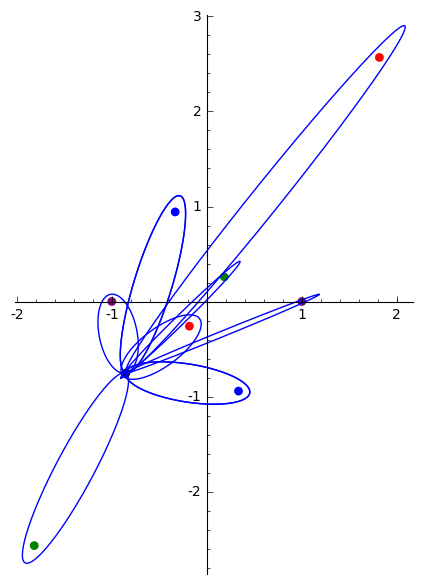

In [11]:
P  = point(stereographic_proj( w1), size=40, color='red')
P += point(stereographic_proj(-w1), size=40, color='red')

P += point(stereographic_proj( w2), size=40, color='green')
P += point(stereographic_proj(-w2), size=40, color='green')

P += point(stereographic_proj( w3), size=40, color='blue')
P += point(stereographic_proj(-w3), size=40, color='blue')

P += point(stereographic_proj( w4), size=40, color='purple')
P += point(stereographic_proj(-w4), size=40, color='purple')

# a nice generic point as a base point
pt = vector([-1,-1/2,1/2,1])
bp = vector(stereographic_proj(Pl.transpose()*pt))
P += point(bp, size=40, color='black')



maj_axis = (bp-vector(stereographic_proj( w1)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.15*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj( w1)))/2
curve1 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve1 ,(theta,0,2*pi))


maj_axis = 1.1*(bp-vector(stereographic_proj(-w1)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w1)))/2
curve2 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve2 ,(theta,0,2*pi))


maj_axis = 1.1*(bp-vector(stereographic_proj( w2)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.05*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj( w2)))/2
curve3 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve3 ,(theta,0,2*pi))


maj_axis = (bp-vector(stereographic_proj(-w2)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w2)))/2
curve4 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve4 ,(theta,0,2*pi))


maj_axis = (bp-vector(stereographic_proj( w3)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj( w3)))/2
curve5 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve5 ,(theta,0,2*pi))

maj_axis = (bp-vector(stereographic_proj(-w3)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w3)))/2
curve6 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve6 ,(theta,0,2*pi))

maj_axis = (bp-vector(stereographic_proj( w3)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj( w3)))/2
curve5 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve5 ,(theta,0,2*pi))

maj_axis = (bp-vector(stereographic_proj(-w3)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w3)))/2
curve6 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve6 ,(theta,0,2*pi))

maj_axis = (bp-vector(stereographic_proj( w4)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.03*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj( w4)))/2
curve7 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve7 ,(theta,0,2*pi))

maj_axis = (bp-vector(stereographic_proj(-w4)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w4)))/2
curve8 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve8 ,(theta,0,2*pi))


P.show()

Bring those loops back up to the sphere!

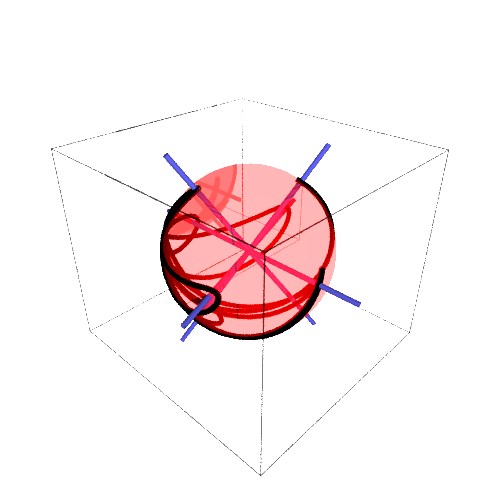

In [12]:
def un_stereographic_proj(v):
    norm_squared = v[0]^2+v[1]^2
    return vector([2*v[0]/(1+norm_squared),2*v[1]/(1+norm_squared),(-1+norm_squared)/(1+norm_squared)])

P  = parametric_plot3d( t*w1, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w2, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w3, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w4, (t,-1.5,1.5),thickness=4)

# just for visualization
x,y,z = var('x,y,z')
P += implicit_plot3d( x^2+y^2+z^2 ==1, (x,-1.1,1.1),(y,-1.1,1.1),(z,-1.1,1.1),color='red',opacity=0.4)


P += parametric_plot3d( un_stereographic_proj(curve1), (theta,0,3), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve2), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve3), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve4), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve5), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve6), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve7), (theta,0,2*pi), thickness=4, color='black')
P += parametric_plot3d( un_stereographic_proj(curve8), (theta,0,2*pi), thickness=4, color='black')


P.show(viewer='tachyon',aspect_ratio=1)
#P.show(viewer='threejs',aspect_ratio=1)
#P.show(aspect_ratio=1)

Now bring them back up to 4-space and draw them as components!

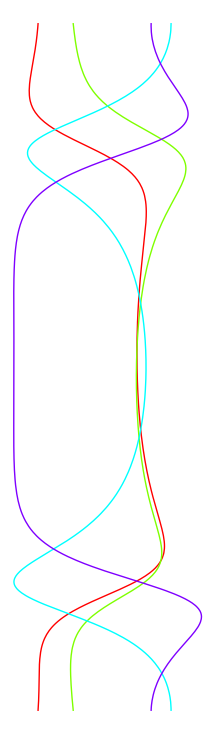

In [13]:
mode1 = Pl*un_stereographic_proj(curve1)

a = mode1[0]
b = mode1[1]
c = mode1[2]
d = mode1[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

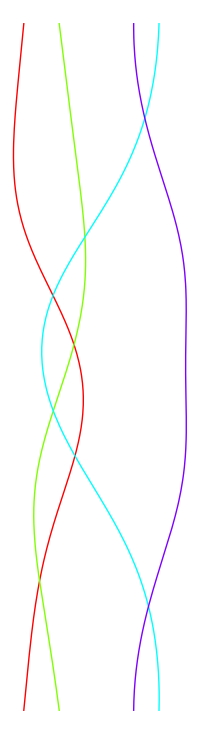

In [14]:
mode2 = Pl*un_stereographic_proj(curve2)

a = mode2[0]
b = mode2[1]
c = mode2[2]
d = mode2[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

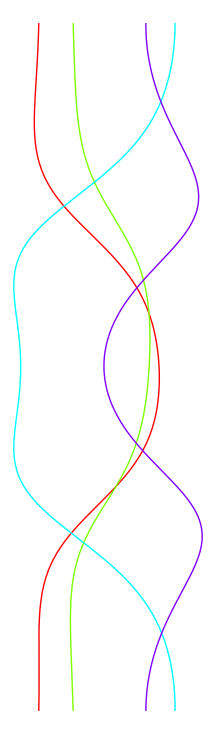

In [15]:
mode3 = Pl*un_stereographic_proj(curve3)

a = mode3[0]
b = mode3[1]
c = mode3[2]
d = mode3[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

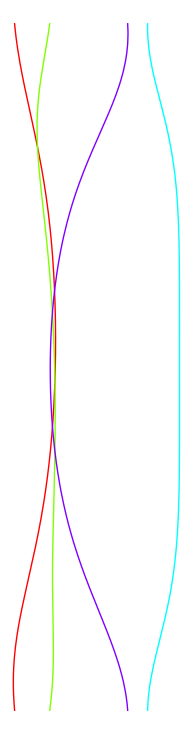

In [16]:
mode4 = Pl*un_stereographic_proj(curve4)

a = mode4[0]
b = mode4[1]
c = mode4[2]
d = mode4[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

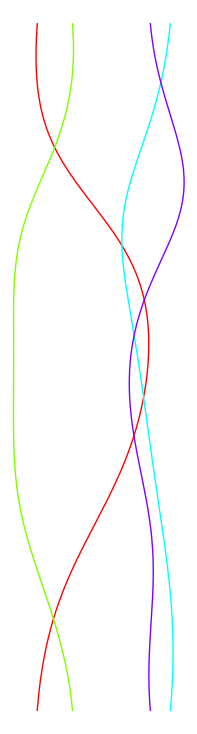

In [17]:
mode5 = Pl*un_stereographic_proj(curve5)

a = mode5[0]
b = mode5[1]
c = mode5[2]
d = mode5[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

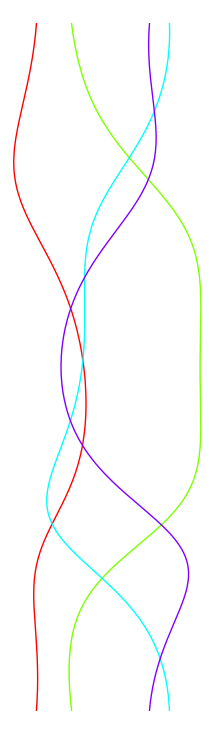

In [18]:
mode6 = Pl*un_stereographic_proj(curve6)

a = mode6[0]
b = mode6[1]
c = mode6[2]
d = mode6[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

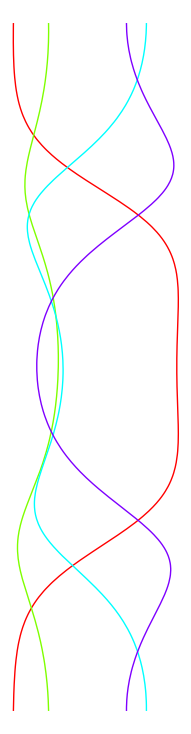

In [19]:
mode7 = Pl*un_stereographic_proj(curve7)

a = mode7[0]
b = mode7[1]
c = mode7[2]
d = mode7[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

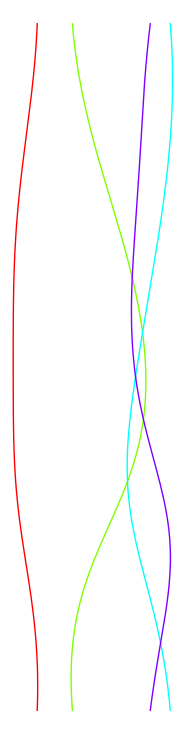

In [20]:
mode8 = Pl*un_stereographic_proj(curve8)

a = mode8[0]
b = mode8[1]
c = mode8[2]
d = mode8[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=10)

## Which of the 2 interations are really necessary? Let's graph their locus

In [21]:
import itertools as it

In [22]:
two_interactions = [ matrix([[1 if index == a else -1 if index == b else 0 for index in range(4)]]) for (a,b) in it.combinations(range(4),2)]

two_interactions_Pl = [ M*Pl for M in two_interactions]

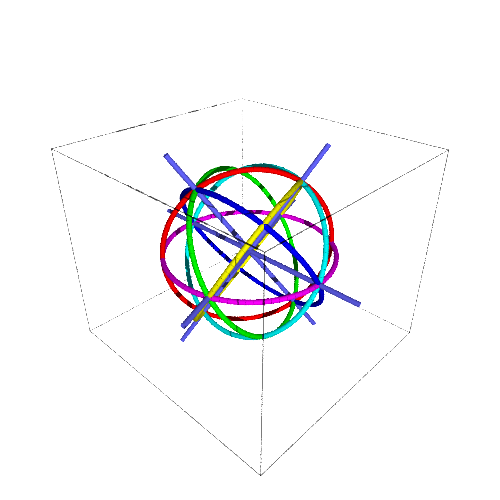

In [23]:
P  = parametric_plot3d( t*w1, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w2, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w3, (t,-1.5,1.5),thickness=4)
P += parametric_plot3d( t*w4, (t,-1.5,1.5),thickness=4)

# just for visualization
x,y,z = var('x,y,z')
#P += implicit_plot3d( x^2+y^2+z^2 ==1, (x,-1.1,1.1),(y,-1.1,1.1),(z,-1.1,1.1),color='red',opacity=0.4)

for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    P += parametric_plot3d( cos(t)*vv1+sin(t)*vv2, (t,0,2*pi), thickness=4, color=rainbow(6)[index])

#P.show(viewer='threejs',aspect_ratio=1)
P.show(viewer='tachyon',aspect_ratio=1)

## maybe it's more clear in the projection

note that there are _pairs_ of intersections which do not give rise to a triple point. 

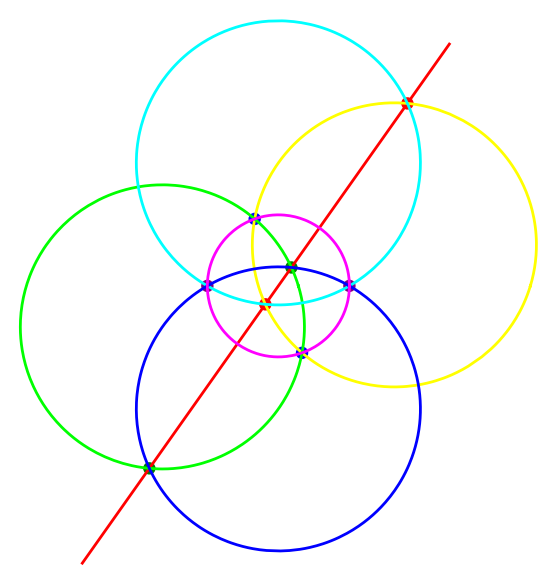

In [24]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,0,2*pi), thickness=2, color=rainbow(6)[index])
    else:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,-4.3,1.1), thickness=2, color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=80, color='red')
P += point(stereographic_proj(-w1), size=80, color='red')

P += point(stereographic_proj( w2), size=80, color='green')
P += point(stereographic_proj(-w2), size=80, color='green')

P += point(stereographic_proj( w3), size=80, color='blue')
P += point(stereographic_proj(-w3), size=80, color='blue')

P += point(stereographic_proj( w4), size=80, color='purple')
P += point(stereographic_proj(-w4), size=80, color='purple')

# a nice generic point as a base point
#pt = vector([-1,-1/2,1/2,1])
#bp = vector(stereographic_proj(Pl.transpose()*pt))
#P += point(bp, size=40, color='black')

P.show(aspect_ratio=1,axes=False)


## curve 8 looks like the most fundamental

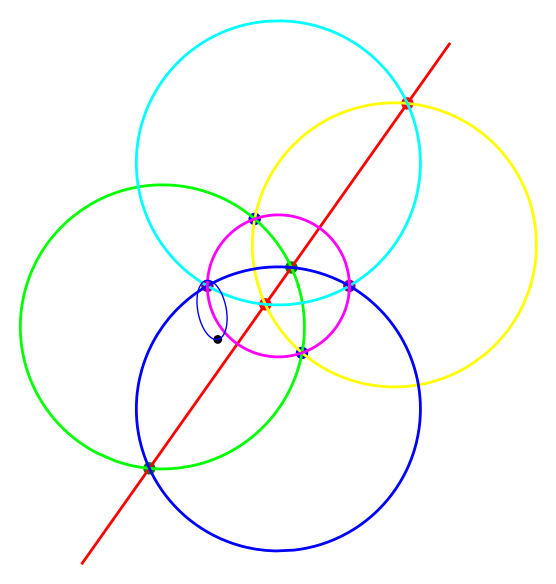

In [25]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,0,2*pi), thickness=2, color=rainbow(6)[index])
    else:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,-4.3,1.1), thickness=2, color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=80, color='red')
P += point(stereographic_proj(-w1), size=80, color='red')

P += point(stereographic_proj( w2), size=80, color='green')
P += point(stereographic_proj(-w2), size=80, color='green')

P += point(stereographic_proj( w3), size=80, color='blue')
P += point(stereographic_proj(-w3), size=80, color='blue')

P += point(stereographic_proj( w4), size=80, color='purple')
P += point(stereographic_proj(-w4), size=80, color='purple')

# a nice generic point as a base point
pt = vector([-1,-1/2,1/2,1])
bp = vector(stereographic_proj(Pl.transpose()*pt))
P += point(bp, size=40, color='black')


maj_axis = (bp-vector(stereographic_proj(-w4)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w4)))/2
curve8 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve8 ,(theta,0,2*pi))


P.show(aspect_ratio=1,axes=False)

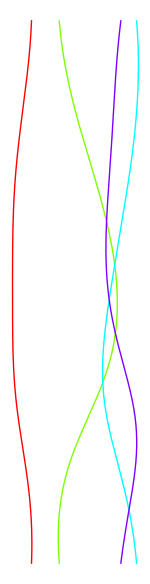

In [26]:
mode8 = Pl*un_stereographic_proj(curve8)

a = mode8[0]
b = mode8[1]
c = mode8[2]
d = mode8[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=8)

### Below, we have the product of all of the generators 

Approximately, anyway, since we don't connect to the base point.

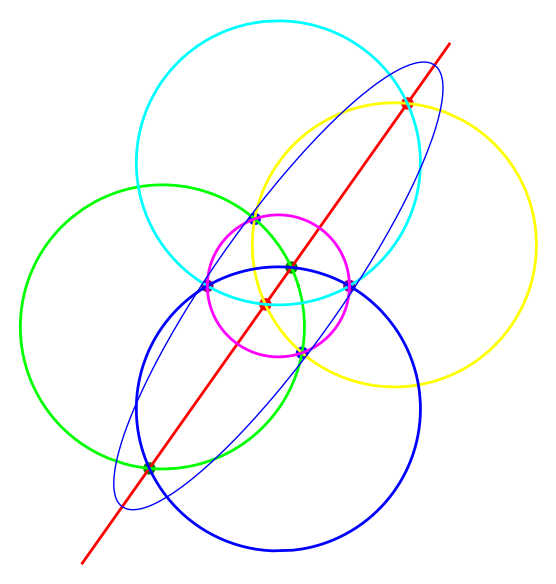

In [27]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,0,2*pi), thickness=2, color=rainbow(6)[index])
    else:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,-4.3,1.1), thickness=2, color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=80, color='red')
P += point(stereographic_proj(-w1), size=80, color='red')

P += point(stereographic_proj( w2), size=80, color='green')
P += point(stereographic_proj(-w2), size=80, color='green')

P += point(stereographic_proj( w3), size=80, color='blue')
P += point(stereographic_proj(-w3), size=80, color='blue')

P += point(stereographic_proj( w4), size=80, color='purple')
P += point(stereographic_proj(-w4), size=80, color='purple')

maj_axis = 1.1*vector(stereographic_proj(w1))
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.9*min_axis/min_axis.norm()
center = vector([0,0])
trivial_curve = cos(theta)*1.1*maj_axis+sin(theta)*min_axis
P += parametric_plot( trivial_curve ,(theta,0,2*pi))

#P += point(trivial_curve(theta=-0.3) ,size=100)

P.show(aspect_ratio=1,axes=False)

For kicks, let's look at an animation of the curve simplifying.

In [28]:
anivec = []

for scale in srange(1.0,4.0,0.25):
    maj_axis = N(scale*1.1)*vector(stereographic_proj(w1))
    min_axis = vector([-maj_axis[1],maj_axis[0]])
    min_axis = 2*scale*0.9*min_axis/min_axis.norm()
    trivial_curve = cos(theta)*1.1*maj_axis+sin(theta)*min_axis

    trivial_mode = Pl*un_stereographic_proj(trivial_curve)

    a = trivial_mode[0]
    b = trivial_mode[1]
    c = trivial_mode[2]
    d = trivial_mode[3]

    P  = parametric_plot((a,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[0],axes=False)
    P += parametric_plot((b,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[1],axes=False)
    P += parametric_plot((c,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[2],axes=False)
    P += parametric_plot((d,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[3],axes=False)

    anivec += [P]
    
a = animate(anivec)


Animation with 12 frames
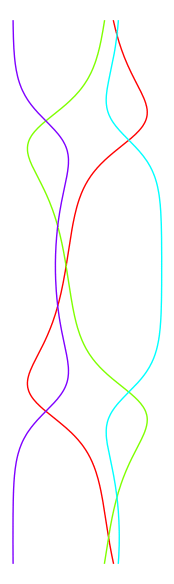

In [29]:
a.show()

# Next case, 5 particles in $\mathbb{R}$

Now we have ${5 \choose 3} = 10$ disallowed configurations, each of which give a pair of equations which we'll encode as matrices $M_1, \ldots, M_{10}$.

### Important note: Whenever you intersect any two of the 3-alike configurations, you get the all-alike configuration. This is important for getting the projection below. It will no longer be true when we have 6-particles.

Again, though, there is an "all equal" vector $u$ which is parallel to all of the 3-planes determined by the above equations. Let's set up some coordinates so that we can easily project the whole thing out.

In [30]:
u = vector([1,1,1,1,1])


v1 = vector([1,0,0,0,0])
v2 = vector([0,1,0,0,0])
v3 = vector([0,0,1,0,0])
v4 = vector([0,0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2
v4 = v4 - (v4*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2
v4 = v4 - (v4*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2
v4 = v4 - (v4*v2)*v2/v2.norm()^2

v4 = v4 - (v4*v1)*v1/v1.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()
v4 = v4/v4.norm()

print(u)
print(v1)
print(v2)
print(v3)
print(v4)

(1/5*sqrt(5), 1/5*sqrt(5), 1/5*sqrt(5), 1/5*sqrt(5), 1/5*sqrt(5))
(2*sqrt(1/5), -1/2*sqrt(1/5), -1/2*sqrt(1/5), -1/2*sqrt(1/5), -1/2*sqrt(1/5))
(0, 1/2*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3))
(0, 0, sqrt(2/3), -1/2*sqrt(2/3), -1/2*sqrt(2/3))
(0, 0, -1/2*sqrt(2/3), sqrt(2/3), -1/2*sqrt(2/3))


In [31]:
M_x = [matrix([[1,-1,0, 0,0],[0,1,-1, 0, 0]]),
       matrix([[1,-1,0, 0,0],[0,1, 0,-1, 0]]),
       matrix([[1,-1,0, 0,0],[0,1, 0, 0,-1]]),
       matrix([[1,0,-1, 0,0],[0,0, 1,-1, 0]]),
       matrix([[1,0,-1, 0,0],[0,0, 1, 0,-1]]),
       matrix([[1,0, 0,-1,0],[0,0, 0, 1,-1]]),
       matrix([[0,1,-1, 0,0],[0,0, 1,-1, 0]]),
       matrix([[0,1,-1, 0,0],[0,0, 1, 0,-1]]),
       matrix([[0,1, 0,-1,0],[0,0, 0, 1,-1]]),
       matrix([[0,0, 1,-1,0],[0,0, 0, 1,-1]])]

Pl = matrix([v1,v2,v3,v4]).transpose()

N_x = [ Np*Pl for Np in M_x ]

In [32]:
def stereographic_proj(v):
    return (v[0]/(1-v[3]),v[1]/(1-v[3]),v[2]/(1-v[3]))

P = Graphics()

epsilon = pi/6 # part of curve going off to oo to exclude

for index, Nn in enumerate(N_x):
    kern = Nn.right_kernel().basis_matrix()
    w1 = kern[0]
    w2 = kern[1]
    
    w2 = w2 - (w2*w1)*w1/w1.norm()^2
    
    w1 = (w1/w1.norm()).simplify_full()
    w2 = (w2/w2.norm()).simplify_full()
    
    curve = cos(t)*w1 + sin(t)*w2
    
    tmin = 0
    tmax = 2*pi
    
    # deal with going off to oo
    #if w1[3] != 0:
    #    t_bad = arctan(w2[3]/w1[3])
    #    if curve(t=t_bad)[3] < 0:
    #        t_bad += pi
    #    tmin = t_bad + epsilon
    #    tmax = tmin + 2*pi - 2*epsilon
    #elif w2[3] != 0:
    #    # so w1[3] == 0
    #    t_bad = pi/2
    #    if curve(t=t_bad)[3] < 0:
    #        t_bad += pi
    #    tmin = t_bad + epsilon
    #    tmax = tmin + 2*pi - 2*epsilon
    
    P += parametric_plot3d( stereographic_proj(curve),
                           (t,tmin,tmax),
                           thickness=4, 
                           plot_points=150,
                           color=rainbow(10)[index])
    

#P.show(viewer='threejs',size=30)
P.show(aspect_ratio=1)

Graphics3d Object

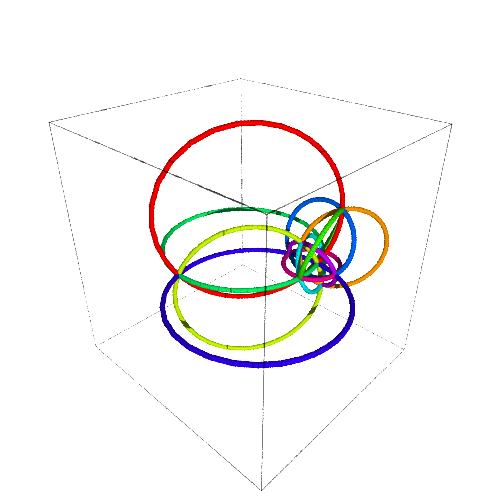

In [33]:
P.show(viewer='tachyon',aspect_ratio=1)

# Computing the homology for 5 particles

Looking at the above graphs, we see that in the excluded locus, $X$, there are ${5 \choose 3}=10$ copies of $S^1$, each of which is divided into 4 intervals by the ${5 \choose 4}=5$ copies of $S^1$ corresponding to the locus of 4-particle interactions.

This gives us a cell complex for $X$ with 40 1-chains and 10 0-chains. The chain complex for $X$ is then
$$ 0 \to \mathbb{Z}^{40} \to \mathbb{Z}^{10} \to 0$$
Since we know that $H_0(X)=\mathbb{Z}$, the rank of $\partial_1$ is 9 so the only possibility for $H_1(X)$ is $\mathbb{Z}^{31}$.

Now, by Alexander duality, $H^1(S^3\setminus X) = H_1(X) = \mathbb{Z}^{31}$.


See the following computation of the homology groups for a higher number of particles: [The Homology of "k-Equal" Manifolds and Related Partition Lattices _Bjorner A., Welker V._][1]

In particular, when they get to 6 particles, you pick up 2nd homology. When you get 9 particles, you get 3rd homology. Next 12 and 4th homology. This seems to be related to commutation relations from 3-interactions which involve disjoint sets of particles. i.e. 6 particles split as (012)(345), 9 particles as (012)(345)(678), etc. 

This indicates that these higher homology classes should be representable as tori of the appropriate dimension.

[1]: http://www.sciencedirect.com/science/article/pii/S0001870885710122?via%3Dihub